In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
time1 = pd.read_csv(r"feature_engineered_time_series.csv")

In [41]:
time1.head()

,date,electricity_demand,temperature_celsius,rainfall_mm,is_holiday,lag_1,lag_7,lag_30,rolling_7_mean,rolling_30_mean,day,month,day_of_week,week_of_year,is_weekend
0,2019-01-31,429.01,28.88,3.04,0,445.62,430.58,414.34,435.101429,426.843667,31,1,3,5,0
1,2019-02-01,452.72,33.94,2.47,0,429.01,436.01,399.36,437.488571,428.622333,1,2,4,5,0
2,2019-02-02,421.28,30.35,6.83,1,452.72,438.60,391.19,435.014286,429.625333,2,2,5,5,1
3,2019-02-03,443.77,28.41,7.43,1,421.28,411.02,433.55,439.692857,429.966000,3,2,6,5,1
4,2019-02-04,473.09,32.31,5.02,0,443.77,441.64,428.43,444.185714,431.454667,4,2,0,6,0


In [63]:
time1['date'] = pd.to_datetime(time1['date'])
time1 = time1.set_index('date')

In [64]:
# Define Features and Target
X = time1.drop('electricity_demand', axis=1)
Y = time1['electricity_demand']

In [66]:
time1.head()

,electricity_demand,temperature_celsius,rainfall_mm,is_holiday,lag_1,lag_7,lag_30,rolling_7_mean,rolling_30_mean,day,month,day_of_week,week_of_year,is_weekend
date,,,,,,,,,,,,,,
2019-01-31,429.01,28.88,3.04,0,445.62,430.58,414.34,435.101429,426.843667,31,1,3,5,0
2019-02-01,452.72,33.94,2.47,0,429.01,436.01,399.36,437.488571,428.622333,1,2,4,5,0
2019-02-02,421.28,30.35,6.83,1,452.72,438.60,391.19,435.014286,429.625333,2,2,5,5,1
2019-02-03,443.77,28.41,7.43,1,421.28,411.02,433.55,439.692857,429.966000,3,2,6,5,1
2019-02-04,473.09,32.31,5.02,0,443.77,441.64,428.43,444.185714,431.454667,4,2,0,6,0


In [68]:
split_date = '2023-01-01'

X_train = X[X.index < split_date]
X_test  = X[X.index >= split_date]

Y_train = Y[Y.index < split_date]
Y_test  = Y[Y.index >= split_date]

print(X_train.shape, X_test.shape)

(1431, 13) (365, 13)


In [69]:
# Base Line Model - Linear Regression
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred_lr=lr.predict(X_test)

In [70]:
# Evaluate Linear Regression 
mae_lr = mean_absolute_error(Y_test, Y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))

print("Linear Regression MAE:", mae_lr)
print("Linear Regression RMSE:", rmse_lr)

Linear Regression MAE: 11.110707864123608
Linear Regression RMSE: 14.114592272257418


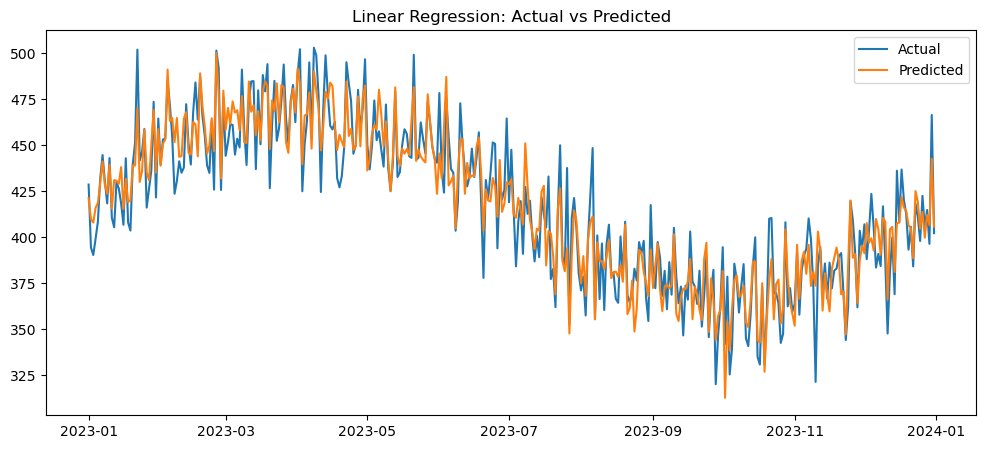

In [71]:
# Plot Predictions-Linear Regression 
plt.figure(figsize=(12,5))
plt.plot(Y_test.index, Y_test, label="Actual")
plt.plot(Y_test.index, Y_pred_lr, label="Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [72]:
# Advanced Model - Random Forest Regressor
rfc = RandomForestRegressor(n_estimators=100,max_depth=10,random_state=42)
rfc.fit(X_train, Y_train)
Y_pred_rfc = rfc.predict(X_test)

In [73]:
# Evaluate Random Forest
mae_rfc = mean_absolute_error(Y_test, Y_pred_rfc)
rmse_rfc = np.sqrt(mean_squared_error(Y_test, Y_pred_rfc))

print("Random Forest MAE:", mae_rfc)
print("Random Forest RMSE:", rmse_rfc)

Random Forest MAE: 11.569570654137966
Random Forest RMSE: 14.614989952862112


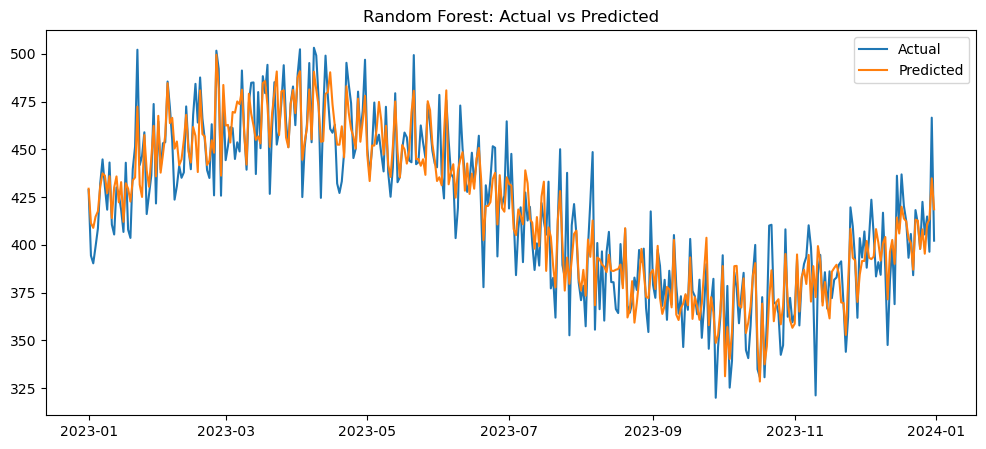

In [74]:
# Plot Predictions - Random Forest
plt.figure(figsize=(12,5))
plt.plot(Y_test.index, Y_test, label="Actual")
plt.plot(Y_test.index, Y_pred_rfc, label="Predicted")
plt.title("Random Forest: Actual vs Predicted")
plt.legend()
plt.show()

In [75]:
# Model Comparison
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rfc],
    "RMSE": [rmse_lr, rmse_rfc]})

results

,Model,MAE,RMSE
0,Linear Regression,11.110708,14.114592
1,Random Forest,11.569571,14.614990


In [76]:
# Feature Importance(Random Forest)
feature_importance = pd.Series(rfc.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_importance.head(10)

temperature_celsius    0.560315
rolling_7_mean         0.290260
rainfall_mm            0.046869
day_of_week            0.019731
lag_1                  0.012642
lag_30                 0.012167
lag_7                  0.011757
day                    0.010889
is_holiday             0.010247
is_weekend             0.009931
dtype: float64

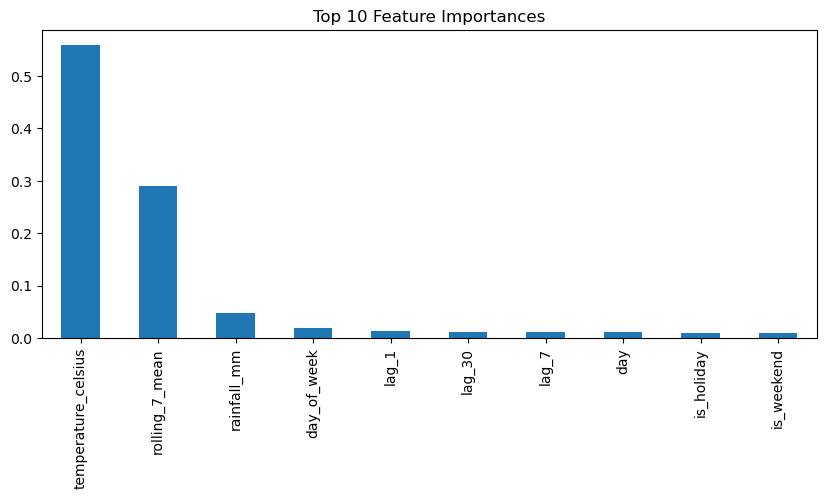

In [77]:
# Plot Feature Importance
feature_importance.head(10).plot(kind='bar', figsize=(10,4))
plt.title("Top 10 Feature Importances")
plt.show()